In [1]:
import cosima_cookbook as cc
import dask.distributed as dsk
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import xarray as xr
from palettable.colorbrewer.qualitative import Set3_11

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

figdir = '/home/561/jn8053/g_e14/figures-tmp/'

clnt = dsk.Client()
clnt

Client Scheduler: tcp://127.0.0.1:45671 Dashboard: /proxy/8787/status,Cluster Workers: 6 Cores: 24 Memory: 250.00 GiB


In [2]:
# Font size
plt.rcParams['font.size'] = 16
# Axes
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
# Saving parameters
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['savefig.bbox'] = 'tight'

In [3]:
session = cc.database.create_session()

In [4]:
shelf_regions = xr.open_dataset('~/g_e14/misc/Antarctic_shelf_basins.nc')
basins = shelf_regions['basins'].where(shelf_regions['basins'] != 100, np.nan)
locs = list(shelf_regions['basin_lookup']['region'][:-1].values)
locs.remove('East Antarctica 04')

# SST

In [5]:
sst = {}
sst['ryf'] = cc.querying.getvar('01deg_jra55v13_ryf9091', 'surface_temp', session, frequency = '1 daily', start_time = '2150-01-01', end_time = '2150-12-31').sel(time = slice('2150-01-01', '2150-12-31')).sel(yt_ocean = slice(None, -59.03))
sst['eup'] = cc.querying.getvar('01deg_jra55v13_ryf9091_easterlies_up10', 'surface_temp', session, frequency = '1 daily', start_time = '2150-01-01', end_time = '2150-12-31').sel(time = slice('2150-01-01', '2150-12-31')).sel(yt_ocean = slice(None, -59.03))
sst['edo'] = cc.querying.getvar('01deg_jra55v13_ryf9091_easterlies_down10', 'surface_temp', session, frequency = '1 daily', start_time = '2150-01-01', end_time = '2150-12-31').sel(time = slice('2150-01-01', '2150-12-31')).sel(yt_ocean = slice(None, -59.03))

In [6]:
for k in ['ryf', 'eup', 'edo']:
    sst[k] = sst[k].compute()

In [7]:
sst_reg = {}
n = 2
for r in locs:
    sst_reg[r, 'ryf'] = sst['ryf'].sel(yt_ocean = slice(None, -59.03)).where(basins == n, np.nan).mean(['xt_ocean', 'yt_ocean'])
    sst_reg[r, 'eup'] = sst['eup'].sel(yt_ocean = slice(None, -59.03)).where(basins == n, np.nan).mean(['xt_ocean', 'yt_ocean'])
    sst_reg[r, 'edo'] = sst['edo'].sel(yt_ocean = slice(None, -59.03)).where(basins == n, np.nan).mean(['xt_ocean', 'yt_ocean'])
    n += 1

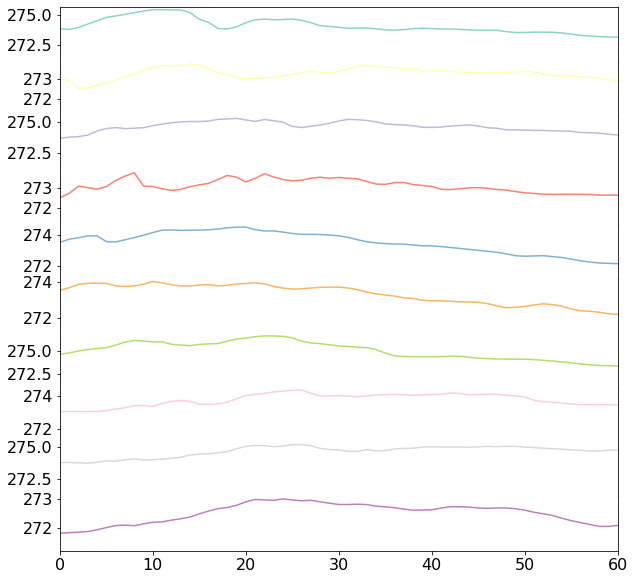

In [25]:
fig, axs = plt.subplots(10,1,figsize = (10,10))
plt.subplots_adjust(wspace = 0, hspace = 0)
for i in range(0, 9):
    axs[i].spines['bottom'].set_visible(False)
    axs[i+1].spines['top'].set_visible(False)
    axs[i].set_xticklabels([])
    axs[i].tick_params(bottom = False)
i = 0
for r in locs:
    axs[i].plot(sst_reg[r, 'eup'], color = Set3_11.mpl_colors[i]); i+=1
for i in range(0, 10):
    axs[i].set_xlim(0, 60)
    #axs[i].set_ylim(-0.2, 0.2)

(0.0, 150.0)

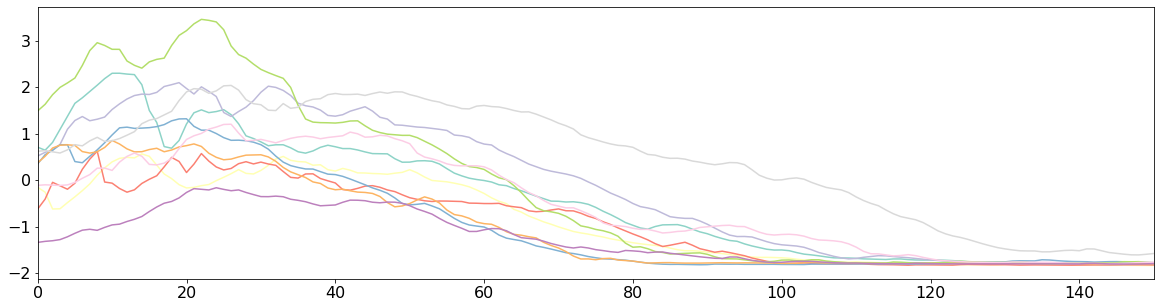

In [27]:
plt.figure(figsize = (20,5))
i = 0
for r in locs:
    plt.plot(sst_reg[r, 'eup']-273.15, color = Set3_11.mpl_colors[i]); i+=1
plt.xlim(0, 150)